In [1]:
import importlib
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation

import LocomotionAnalysisTools as lat

In [2]:
importlib.reload(lat)

<module 'LocomotionAnalysisTools' from 'C:\\Users\\robaeten\\OneDrive - UGent\\Documenten\\Werk\\python\\GMC_GPR_GDA\\LocomotionAnalysisTools.py'>

In [3]:
# dev_file = "C:/Users/robaeten/OneDrive - UGent/Gait Classification and References/Data/Subject1/Session4_Proc_GMC/Subj1 - Rec1 - Circular walking (diam 2m)(CW) - Rep1 - GloAng.csv"
# dev_file = "C:/Users/robaeten/OneDrive - UGent/Gait Classification and References/Data/Subject1/Session4_Proc_GRF/Subj1 - Rec1 - Circular walking (diam 2m)(CW) - Rep1_1 - GlobalAngles.csv"
# dev_file = "C:/Users/robaeten/OneDrive - UGent/Gait Classification and References/Data/Subject1/Session4_Proc_GMC/Subj1 - Rec2 - Stair ascent (SOS)(L first)(1) - Rep1 - GloAng.csv"
dev_file = "C:/Users/robaeten/OneDrive - UGent/Gait Classification and References/Data/Subject1/Session4_Proc_GMC/Subj1 - Rec2 - Standing - Rep1 - GloAng.csv"
df = pd.read_csv(dev_file)

cols_R = ["Root_RX", "Root_RY", "Root_RZ"]
f_sample = 100

pel_rot_vecs = df[cols_R].to_numpy()
pel_rot_vecs = pel_rot_vecs * (np.pi/180) # to radians

In [4]:
def get_pelvis_angles(pel_rot_vecs, f_sample=100): 
    # Constants
    up = np.array([0, 0, 1])
    to_deg = 180/np.pi
    
    # Change orientation representation, rotation vector to rotation matrices
    n_pts = np.shape(pel_rot_vecs)[0]
    rot_matrices = np.zeros((n_pts, 3, 3))
    inv_rot_matrices = np.zeros((n_pts, 3, 3))

    x_axes = np.zeros((n_pts, 3))
    y_axes = np.zeros((n_pts, 3))
    z_axes = np.zeros((n_pts, 3))

    alphas = np.zeros(n_pts)
    betas = np.zeros(n_pts)
    gammas = np.zeros(n_pts)

    for i in np.arange(n_pts):
        rotation = Rotation.from_rotvec(pel_rot_vecs[i, :])
        rot_matrices[i, :, :] = rotation.as_matrix()
        inv_rot_matrices[i, :, :] = np.linalg.inv(rot_matrices[i, :, :])

        x_axes[i, :] = np.transpose(rot_matrices[i, 0, :])
        y_axes[i, :] = np.transpose(rot_matrices[i, 1, :])
        z_axes[i, :] = np.transpose(rot_matrices[i, 2, :])

        alphas[i] = np.arccos(np.dot(x_axes[i, :], up)) * to_deg - 90
        betas[i] = np.arccos(np.dot(y_axes[i, :], up)) * to_deg - 90
        gammas[i] = np.arccos(np.dot(z_axes[i, :], up)) * to_deg - 90

    return alphas, betas, gammas

In [5]:
alphas, betas, gammas = get_pelvis_angles(pel_rot_vecs, f_sample=f_sample)

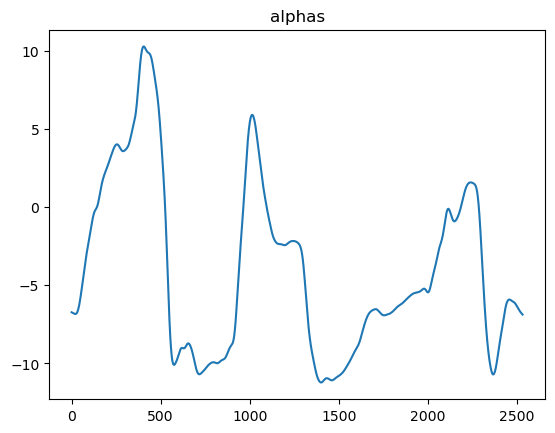

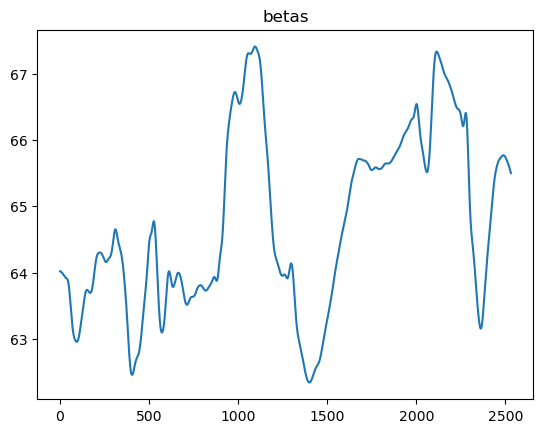

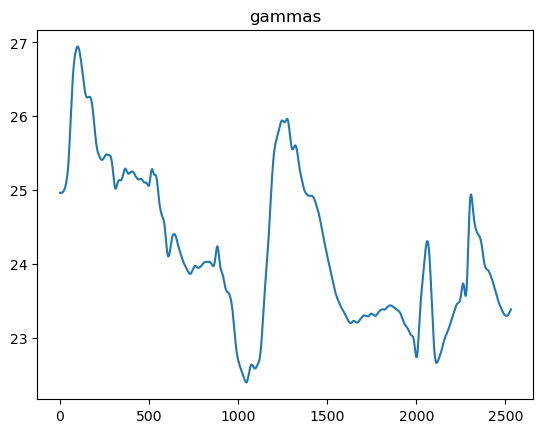

In [6]:
plt.figure()
plt.title("alphas")
plt.plot(alphas)
plt.show()

plt.figure()
plt.title("betas")
plt.plot(betas)
plt.show()

plt.figure()
plt.title("gammas")
plt.plot(gammas)
plt.show()

In [13]:
def get_pelvis_angles(pel_rot_vecs, f_sample=100): 
    # Constants
    up = np.array([0, 0, 1])
    to_deg = 180/np.pi
    
    # Change orientation representation, rotation vector to rotation matrices
    n_pts = np.shape(pel_rot_vecs)[0]
    rot_matrices = np.zeros((n_pts, 3, 3))
    z_axes = np.zeros((n_pts, 3))
    pelvis_angles = np.zeros(n_pts)

    for i in np.arange(n_pts):
        rotation = Rotation.from_rotvec(pel_rot_vecs[i, :])
        rot_matrices[i, :, :] = rotation.as_matrix()
        z_axes[i, :] = np.transpose(rot_matrices[i, 2, :])
        pelvis_angles[i] = np.arccos(np.dot(z_axes[i, :], up)) * to_deg - 90

    return pelvis_angles

In [15]:
pelvis_angles = get_pelvis_angles(pel_rot_vecs, f_sample=f_sample)

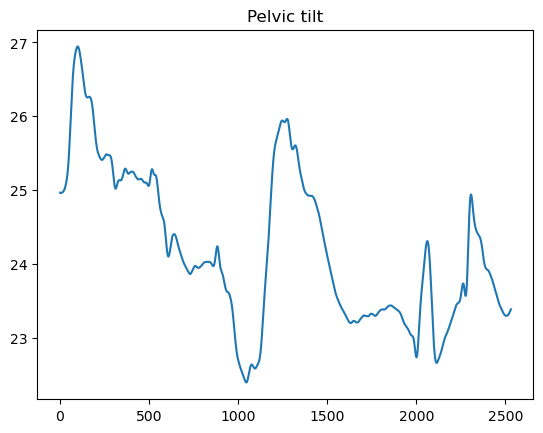

In [17]:
plt.figure()
plt.title("Pelvic tilt")
plt.plot(pelvis_angles)
plt.show()